In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r0=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases.csv")
#ind=pd.read_csv("/content/drive/MyDrive/Climate_Ready_Boston_Social_Vulnerability.csv")

#cons=pd.dataframe(index=r.index)

#group=r.groupby(by="CT_ID_10")
#CTID=a.index

#for key,value in group:
   

<ipython-input-1-b00505173821>:5: DtypeWarning: Columns (17,18,29) have mixed types. Specify dtype option on import or set low_memory=False.
  r0=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases.csv")


In [2]:
#r1=pd.read_csv("/content/drive/MyDrive/CT00.csv")
r2=pd.read_csv("/content/drive/MyDrive/CT10.csv")
#df =pd.concat([r1,r2],axis=0)

data1_subset =  r2[['GEOID10','INTPTLAT10','INTPTLON10']]

merged_data = pd.merge(data1_subset, r0, on='CT_ID_10')

merged_data.head()
#merged_data.to_csv("/content/drive/MyDrive/311 cases/311 Cases_loc.csv")

KeyError: ignored

In [9]:
#r1=pd.read_csv("/content/drive/MyDrive/CT00.csv")
r2=pd.read_csv("/content/drive/MyDrive/CT10.csv")
r2["AALL10"]=r2["ALAND10"]+r2["AWATER10"]
#df =pd.concat([r1,r2],axis=0)
#print(df)
#df['CTIDFP00'].fillna(df['GEOID10'], inplace=True)
data1_subset = r2[['GEOID10','INTPTLAT10','INTPTLON10',"AALL10"]].rename(columns={'GEOID10': 'CT_ID_10'})
print(data1_subset)
new_csv = r0.groupby(['TYPE','CT_ID_10']).size().reset_index(name='total')
#print(new_csv)
# reset the index of the grouped dataframe and rename the columns
#new_csv = new_csv.reset_index()
#new_csv.columns = ['TYPE','CT_ID_10','total']
new_csv = pd.merge(data1_subset, new_csv, on='CT_ID_10')
#print(new_csv)
new_csv.to_csv("/content/drive/MyDrive/casetype_loc.csv")

        CT_ID_10  INTPTLAT10  INTPTLON10   AALL10
0    25025010405   42.339865  -71.089605   363702
1    25025010404   42.341967  -71.088638   136829
2    25025010801   42.354119  -71.077022   127905
3    25025010702   42.351835  -71.075516   299981
4    25025010204   42.346289  -71.103388   254706
..           ...         ...         ...      ...
199  25025020301   42.363174  -71.068646   256586
200  25025020101   42.357709  -71.069411   223142
201  25025081001   42.334567  -71.106830   558488
202  25025010403   42.345075  -71.088061    88556
203  25025000100   42.361485  -71.138588  1794942

[204 rows x 4 columns]


In [24]:
print(r0['TYPE'].value_counts())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

General Request                                      373372
Parking Enforcement                                  252927
Schedule a Bulk Item Pickup                          176929
Requests for Street Cleaning                         153910
Missed Trash/Recycling/Yard Waste/Bulk Item          122880
Request for Pothole Repair                           108017
Improper Storage of Trash (Barrels)                   91573
Street Light Outages                                  83932
Request for Snow Plowing                              75976
CE Collection                                         58278
Tree Maintenance Requests                             55028
Request for Recycling Cart                            52463
Sign Repair                                           50555
Sidewalk Repair (Make Safe)                           49125
Schedule a Bulk Item Pickup SS                        47110
Graffiti Removal                                      46051
Pothole Repair (Internal)               

In [ ]:
group=r0.groupby(['TYPE','CT_ID_10'])
new_csv['cl_ratio']=0
cl_rt_ls=[]
for key,value in group:
  if new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]),'total'].values>=20:
      new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'] = value["CLOSED_DT"].isna().sum()/value["CLOSED_DT"].shape[0]
      if key[0]=='Unsatisfactory Living Conditions':
        print(value["CLOSED_DT"].isna().sum()/value["CLOSED_DT"].shape[0])
  else:
    new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'] = 0
new_csv.to_csv("/content/drive/MyDrive/casetype_loc.csv")
print(new_csv)
  #clo_rnums=value["CLOSED_DT"].value_counts()
  #print(value["CLOSED_DT"].isna().sum())
  #print(value["CLOSED_DT"].shape[0])
  #num = clo_rnums.isna().sum()
  #print((value["CLOSED_DT"].shape[0]-value["CLOSED_DT"].isna().sum())/value["CLOSED_DT"].shape[0])
  #cl_rt=[key,value["CLOSED_DT"].shape[0],value["CLOSED_DT"].isna().sum(),(value["CLOSED_DT"].isna().sum())/value["CLOSED_DT"].shape[0]]#least closure rate
  #if cl_rt[1]>20 and key[0]!="General Request":
  #    cl_rt_ls.append(cl_rt)
#most_group=sorted(cl_rt_ls,key=(lambda x:x[2]),reverse=True)
#ratio_group=sorted(cl_rt_ls,key=(lambda x:x[3]),reverse=True)


        CT_ID_10     ratio  INTPTLAT10  INTPTLON10     AALL10
0    25025010405  0.000000   42.339865  -71.089605     363702
1    25025010404  0.000000   42.341967  -71.088638     136829
2    25025010801  0.000000   42.354119  -71.077022     127905
3    25025010702  0.000000   42.351835  -71.075516     299981
4    25025010204  0.000000   42.346289  -71.103388     254706
5    25025010802  0.000000   42.351518  -71.085680     155467
6    25025010104  0.000000   42.349432  -71.093750     286731
7    25025000703  0.000000   42.351329  -71.128216     178020
8    25025000504  0.000000   42.341472  -71.143826     333187
9    25025000704  0.000000   42.350003  -71.133404     239781
10   25025010103  0.000000   42.349782  -71.103448     273032
11   25025000803  0.000000   42.359477  -71.121263    1158191
12   25025980300  0.000000   42.300613  -71.094613    2103526
13   25025120201  0.000000   42.305157  -71.108367     719468
14   25025120104  0.000000   42.305686  -71.117305     290296
15   250

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='INTPTLON10', ylabel='INTPTLAT10'>

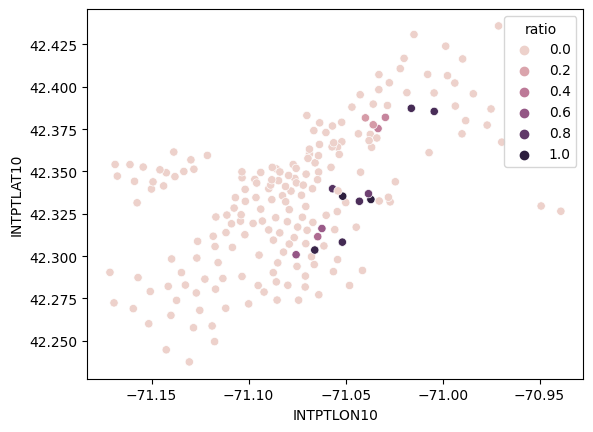

In [26]:
import seaborn as sns
#group=r0.groupby(['TYPE','CT_ID_10'])
heat_data=pd.DataFrame(columns=['CT_ID_10','ratio'])
heat_data['CT_ID_10']=data1_subset['CT_ID_10'].unique()
heat_data=pd.merge(heat_data,data1_subset, on='CT_ID_10')
#print(data1_subset)
#print(heat_data)
#new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'] = 0
for key,value in group:
  if key[0]=="Base Repair (Internal)":
      #print(key[1])
      #print(heat_data.loc[heat_data['CT_ID_10'] == key[1],"ratio"])
      heat_data.loc[heat_data['CT_ID_10'] == key[1],"ratio"]=new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'].values
      #print(heat_data.loc[heat_data['CT_ID_10'] == key[1],"ratio"])
heat_data['ratio'] = heat_data['ratio'].fillna(0.0)
print(heat_data)
#print(pivoted_df)
#sizes = heat_data.pivot(index='INTPTLAT10', columns='INTPTLAT10INTPTLON10', values='AALL10')
# create heatmap
#matrix = heat_data.pivot_table(index='INTPTLON10', columns='INTPTLAT10', values='ratio')
#sns.heatmap(matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=100, square=True, cbar_kws={"shrink": .5})

# create scatterplot with point size based on 'd' column
    
#matrix = heat_data.pivot_table(index='INTPTLON10', columns='INTPTLAT10', values='ratio')
#sizes = heat_data.pivot(index='INTPTLON10', columns='INTPTLAT10', values='AALL10')

#sns.heatmap(matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5})
#cmap = plt.cm.get_cmap("jet")
norm = plt.Normalize(heat_data['ratio'].min(), heat_data['ratio'].max())
sns.scatterplot(data=heat_data, x='INTPTLON10', y='INTPTLAT10', hue='ratio',cmap='coolwarm',hue_norm=norm)

        CT_ID_10 ratio  INTPTLAT10  INTPTLON10   AALL10
0    25025010405   0.0   42.339865  -71.089605   363702
1    25025010404   0.0   42.341967  -71.088638   136829
2    25025010801   0.0   42.354119  -71.077022   127905
3    25025010702   0.0   42.351835  -71.075516   299981
4    25025010204   0.0   42.346289  -71.103388   254706
..           ...   ...         ...         ...      ...
199  25025020301   0.0   42.363174  -71.068646   256586
200  25025020101   0.0   42.357709  -71.069411   223142
201  25025081001   0.0   42.334567  -71.106830   558488
202  25025010403   0.0   42.345075  -71.088061    88556
203  25025000100   0.0   42.361485  -71.138588  1794942

[204 rows x 5 columns]


/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='INTPTLON10', ylabel='INTPTLAT10'>

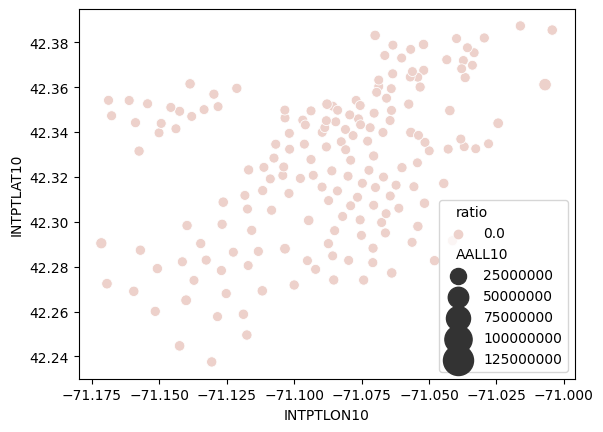

In [ ]:
import seaborn as sns
#group=r0.groupby(['TYPE','CT_ID_10'])
heat_data=pd.DataFrame(columns=['CT_ID_10','ratio'])
heat_data['CT_ID_10']=data1_subset['CT_ID_10'].unique()
heat_data=pd.merge(heat_data,data1_subset, on='CT_ID_10')
#print(data1_subset)
#print(heat_data)
#new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'] = 0
for key,value in group:
  if key[0]=="Schedule a Bulk Item Pickup":
      #print(key[1])
      #print(new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'].values)
      heat_data.loc[heat_data['CT_ID_10'] == key[1],"ratio"]=new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'].values
      #print(heat_data.loc[heat_data['CT_ID_10'] == key[1],"ratio"])
print(heat_data)
#print(pivoted_df)
#sizes = heat_data.pivot(index='INTPTLAT10', columns='INTPTLAT10INTPTLON10', values='AALL10')
# create heatmap
#matrix = heat_data.pivot_table(index='INTPTLON10', columns='INTPTLAT10', values='ratio')
#sns.heatmap(matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=100, square=True, cbar_kws={"shrink": .5})

# create scatterplot with point size based on 'd' column
    
#matrix = heat_data.pivot_table(index='INTPTLON10', columns='INTPTLAT10', values='ratio')
#sizes = heat_data.pivot(index='INTPTLON10', columns='INTPTLAT10', values='AALL10')

#sns.heatmap(matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5})
#cmap = plt.cm.get_cmap("jet")
norm = plt.Normalize(heat_data['ratio'].min(), heat_data['ratio'].max())
sns.scatterplot(data=heat_data, x='INTPTLON10', y='INTPTLAT10', hue='ratio', size='AALL10', sizes=(50, 500),cmap='coolwarm',hue_norm=norm)

        CT_ID_10     ratio  INTPTLAT10  INTPTLON10   AALL10
0    25025010405     0.085   42.339865  -71.089605   363702
1    25025010404  0.019868   42.341967  -71.088638   136829
2    25025010801  0.058594   42.354119  -71.077022   127905
3    25025010702  0.036789   42.351835  -71.075516   299981
4    25025010204  0.090909   42.346289  -71.103388   254706
..           ...       ...         ...         ...      ...
199  25025020301  0.382609   42.363174  -71.068646   256586
200  25025020101  0.025256   42.357709  -71.069411   223142
201  25025081001  0.096708   42.334567  -71.106830   558488
202  25025010403  0.032397   42.345075  -71.088061    88556
203  25025000100  0.045593   42.361485  -71.138588  1794942

[204 rows x 5 columns]


/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='INTPTLON10', ylabel='INTPTLAT10'>

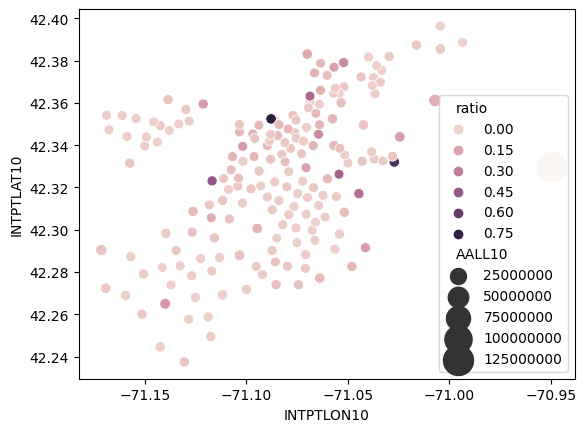

In [ ]:
import seaborn as sns
#group=r0.groupby(['TYPE','CT_ID_10'])
heat_data=pd.DataFrame(columns=['CT_ID_10','ratio'])
heat_data['CT_ID_10']=data1_subset['CT_ID_10'].unique()
heat_data=pd.merge(heat_data,data1_subset, on='CT_ID_10')
#print(data1_subset)
#print(heat_data)
#new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'] = 0
for key,value in group:
  if key[0]=="Requests for Street Cleaning":
      #print(key[1])
      #print(new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'].values)
      heat_data.loc[heat_data['CT_ID_10'] == key[1],"ratio"]=new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'].values
      #print(heat_data.loc[heat_data['CT_ID_10'] == key[1],"ratio"])
print(heat_data)
#print(pivoted_df)
#sizes = heat_data.pivot(index='INTPTLAT10', columns='INTPTLAT10INTPTLON10', values='AALL10')
# create heatmap
#matrix = heat_data.pivot_table(index='INTPTLON10', columns='INTPTLAT10', values='ratio')
#sns.heatmap(matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=100, square=True, cbar_kws={"shrink": .5})

# create scatterplot with point size based on 'd' column
    
#matrix = heat_data.pivot_table(index='INTPTLON10', columns='INTPTLAT10', values='ratio')
#sizes = heat_data.pivot(index='INTPTLON10', columns='INTPTLAT10', values='AALL10')

#sns.heatmap(matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5})
#cmap = plt.cm.get_cmap("jet")
norm = plt.Normalize(heat_data['ratio'].min(), heat_data['ratio'].max())
sns.scatterplot(data=heat_data, x='INTPTLON10', y='INTPTLAT10', hue='ratio', size='AALL10', sizes=(50, 500),cmap='coolwarm',hue_norm=norm)

        CT_ID_10     ratio  INTPTLAT10  INTPTLON10   AALL10
0    25025010405       0.0   42.339865  -71.089605   363702
1    25025010404       0.0   42.341967  -71.088638   136829
2    25025010801       0.0   42.354119  -71.077022   127905
3    25025010702       0.0   42.351835  -71.075516   299981
4    25025010204  0.003472   42.346289  -71.103388   254706
..           ...       ...         ...         ...      ...
199  25025020301       0.0   42.363174  -71.068646   256586
200  25025020101       0.0   42.357709  -71.069411   223142
201  25025081001  0.001949   42.334567  -71.106830   558488
202  25025010403       0.0   42.345075  -71.088061    88556
203  25025000100  0.001328   42.361485  -71.138588  1794942

[204 rows x 5 columns]


/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='INTPTLON10', ylabel='INTPTLAT10'>

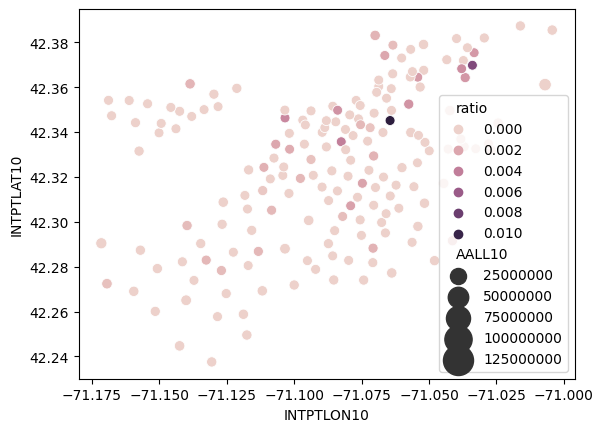

In [ ]:
import seaborn as sns
#group=r0.groupby(['TYPE','CT_ID_10'])
heat_data=pd.DataFrame(columns=['CT_ID_10','ratio'])
heat_data['CT_ID_10']=data1_subset['CT_ID_10'].unique()
heat_data=pd.merge(heat_data,data1_subset, on='CT_ID_10')
#print(data1_subset)
#print(heat_data)
#new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'] = 0
for key,value in group:
  if key[0]=="Missed Trash/Recycling/Yard Waste/Bulk Item":
      #print(key[1])
      #print(new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'].values)
      heat_data.loc[heat_data['CT_ID_10'] == key[1],"ratio"]=new_csv.loc[(new_csv['TYPE'] == key[0]) & (new_csv['CT_ID_10'] == key[1]), 'cl_ratio'].values
      #print(heat_data.loc[heat_data['CT_ID_10'] == key[1],"ratio"])
print(heat_data)
#print(pivoted_df)
#sizes = heat_data.pivot(index='INTPTLAT10', columns='INTPTLAT10INTPTLON10', values='AALL10')
# create heatmap
#matrix = heat_data.pivot_table(index='INTPTLON10', columns='INTPTLAT10', values='ratio')
#sns.heatmap(matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=100, square=True, cbar_kws={"shrink": .5})

# create scatterplot with point size based on 'd' column
    
#matrix = heat_data.pivot_table(index='INTPTLON10', columns='INTPTLAT10', values='ratio')
#sizes = heat_data.pivot(index='INTPTLON10', columns='INTPTLAT10', values='AALL10')

#sns.heatmap(matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5})
#cmap = plt.cm.get_cmap("jet")
norm = plt.Normalize(heat_data['ratio'].min(), heat_data['ratio'].max())
sns.scatterplot(data=heat_data, x='INTPTLON10', y='INTPTLAT10', hue='ratio', size='AALL10', sizes=(50, 500),cmap='coolwarm',hue_norm=norm)

In [ ]:
group=r0.groupby(['CT_ID_10'])
cl_rt_ls=[]
for key,value in group:
  #clo_rnums=value["CLOSED_DT"].value_counts()
  #print(value["CLOSED_DT"].isna().sum())
  #print(value["CLOSED_DT"].shape[0])
  #num = clo_rnums.isna().sum()
  #print((value["CLOSED_DT"].shape[0]-value["CLOSED_DT"].isna().sum())/value["CLOSED_DT"].shape[0])
  cl_rt=[key,value["CLOSED_DT"].shape[0],value["CLOSED_DT"].isna().sum(),(value["CLOSED_DT"].isna().sum())/value["CLOSED_DT"].shape[0]]
  if cl_rt[1]>20:
      cl_rt_ls.append(cl_rt)
most_group=sorted(cl_rt_ls,key=(lambda x:x[2]),reverse=True)
ratio_group=sorted(cl_rt_ls,key=(lambda x:x[3]),reverse=True)

<ipython-input-103-a09cc76bc7fc>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key,value in group:


[[25025030300.0, 41620, 6363, 0.15288322921672273], [25025070101.0, 39018, 5098, 0.13065764518939976], [25025120400.0, 31006, 3561, 0.11484873895375089], [25025061200.0, 28406, 3206, 0.11286347954657466], [25025080100.0, 24259, 3168, 0.1305907086029927], [25025090700.0, 26049, 3089, 0.11858420668739683], [25025092101.0, 27502, 3082, 0.11206457712166389], [25025100500.0, 28227, 2938, 0.10408474155949977], [25025070500.0, 35083, 2869, 0.0817774990736254], [25025060501.0, 30755, 2794, 0.09084701674524467]]


<Figure size 640x480 with 0 Axes>

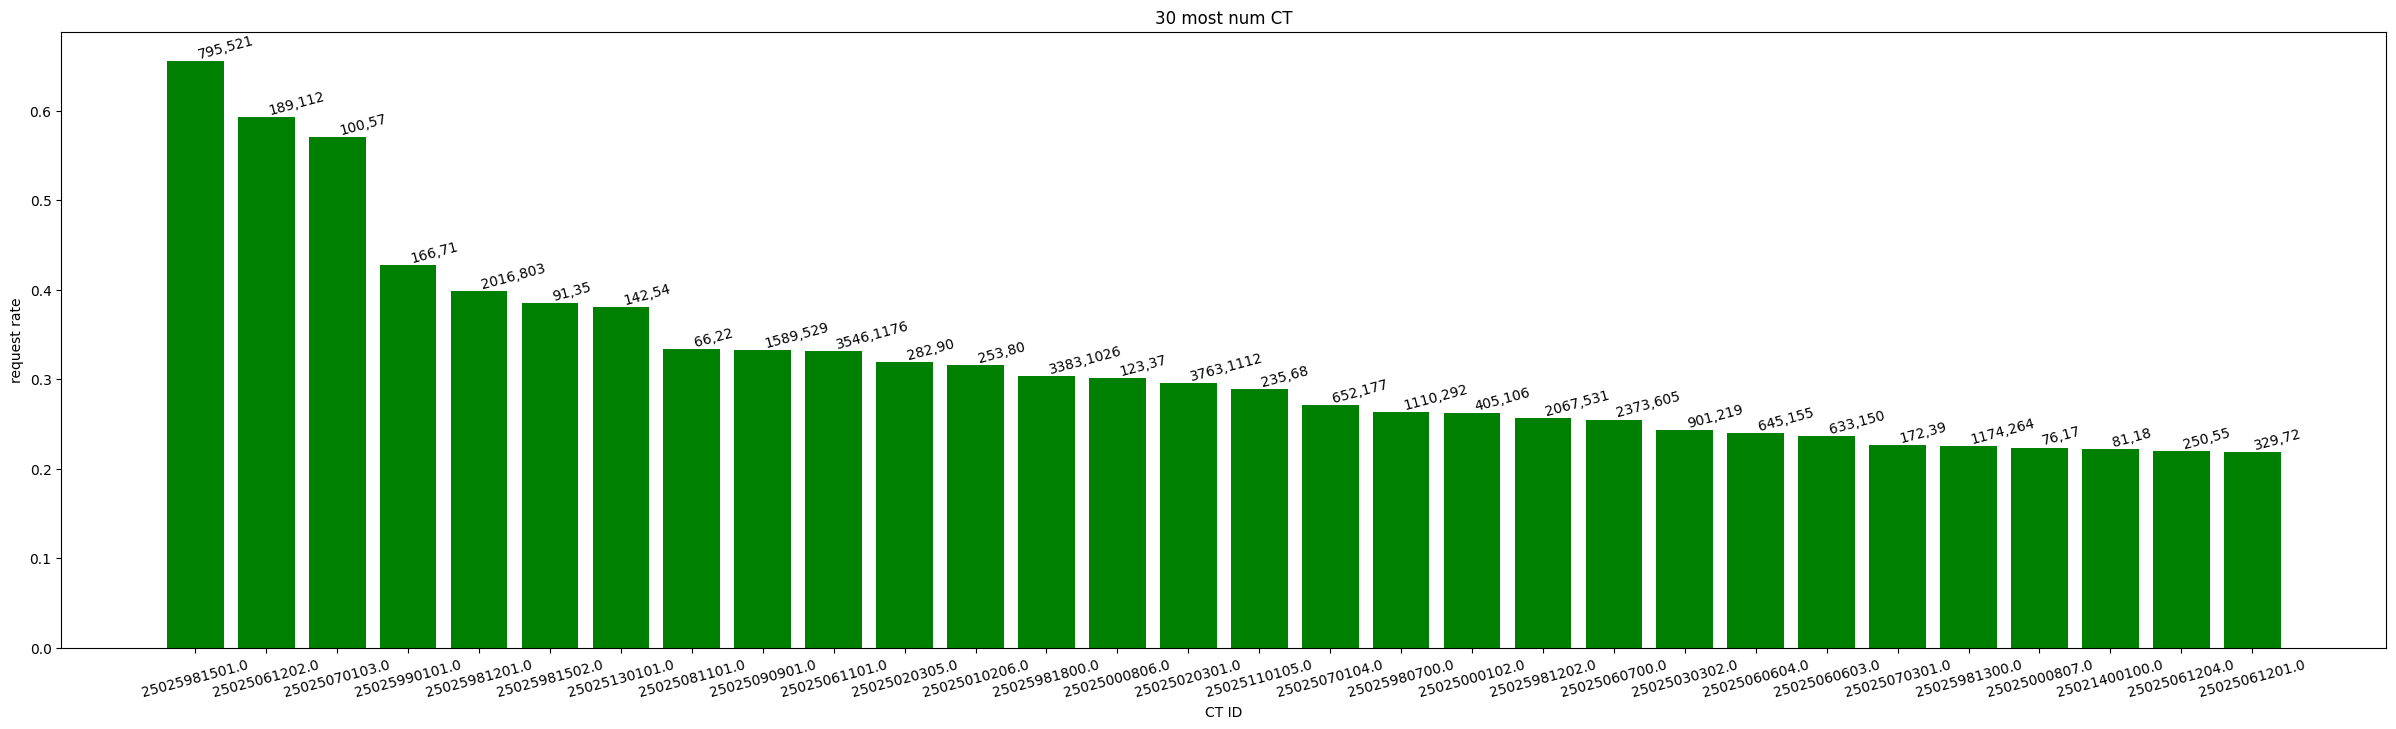

In [ ]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(30,8))
plt_keyset=[x[0] for x in ratio_group[:30]] #if x[1]>=500]#CT_ID
plt_total=[x[1] for x in ratio_group[:30]] # if x[1]>=500]#所有request数
plt_null=[x[2] for x in ratio_group[:30]] # if x[1]>=500]#最多的request
plt_ratio=[x[3] for x in ratio_group[:30]] # if x[1]>=500]#最多request的数量
#plt_ratio=[x[4] for x in ratio_group[:10]] # if x[1]>=500]#最多request占比
i=range(30)
plt.bar(i, plt_ratio, fc='g')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('30 most num CT')
#plt.legend()
plt.xticks(i,plt_keyset,rotation=15)
for i in range (30):
    plt.text(i+0.01,plt_ratio[i]+0.003,str(format(plt_total[i],'.0f'))+','+str(plt_null[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_clo_ratio_CT.png")

#plt.figure(2)


#print(np.array(group))

[[25025030300.0, 41620, 6363, 0.15288322921672273], [25025070101.0, 39018, 5098, 0.13065764518939976], [25025120400.0, 31006, 3561, 0.11484873895375089], [25025061200.0, 28406, 3206, 0.11286347954657466], [25025080100.0, 24259, 3168, 0.1305907086029927], [25025090700.0, 26049, 3089, 0.11858420668739683], [25025092101.0, 27502, 3082, 0.11206457712166389], [25025100500.0, 28227, 2938, 0.10408474155949977], [25025070500.0, 35083, 2869, 0.0817774990736254], [25025060501.0, 30755, 2794, 0.09084701674524467]]


<Figure size 640x480 with 0 Axes>

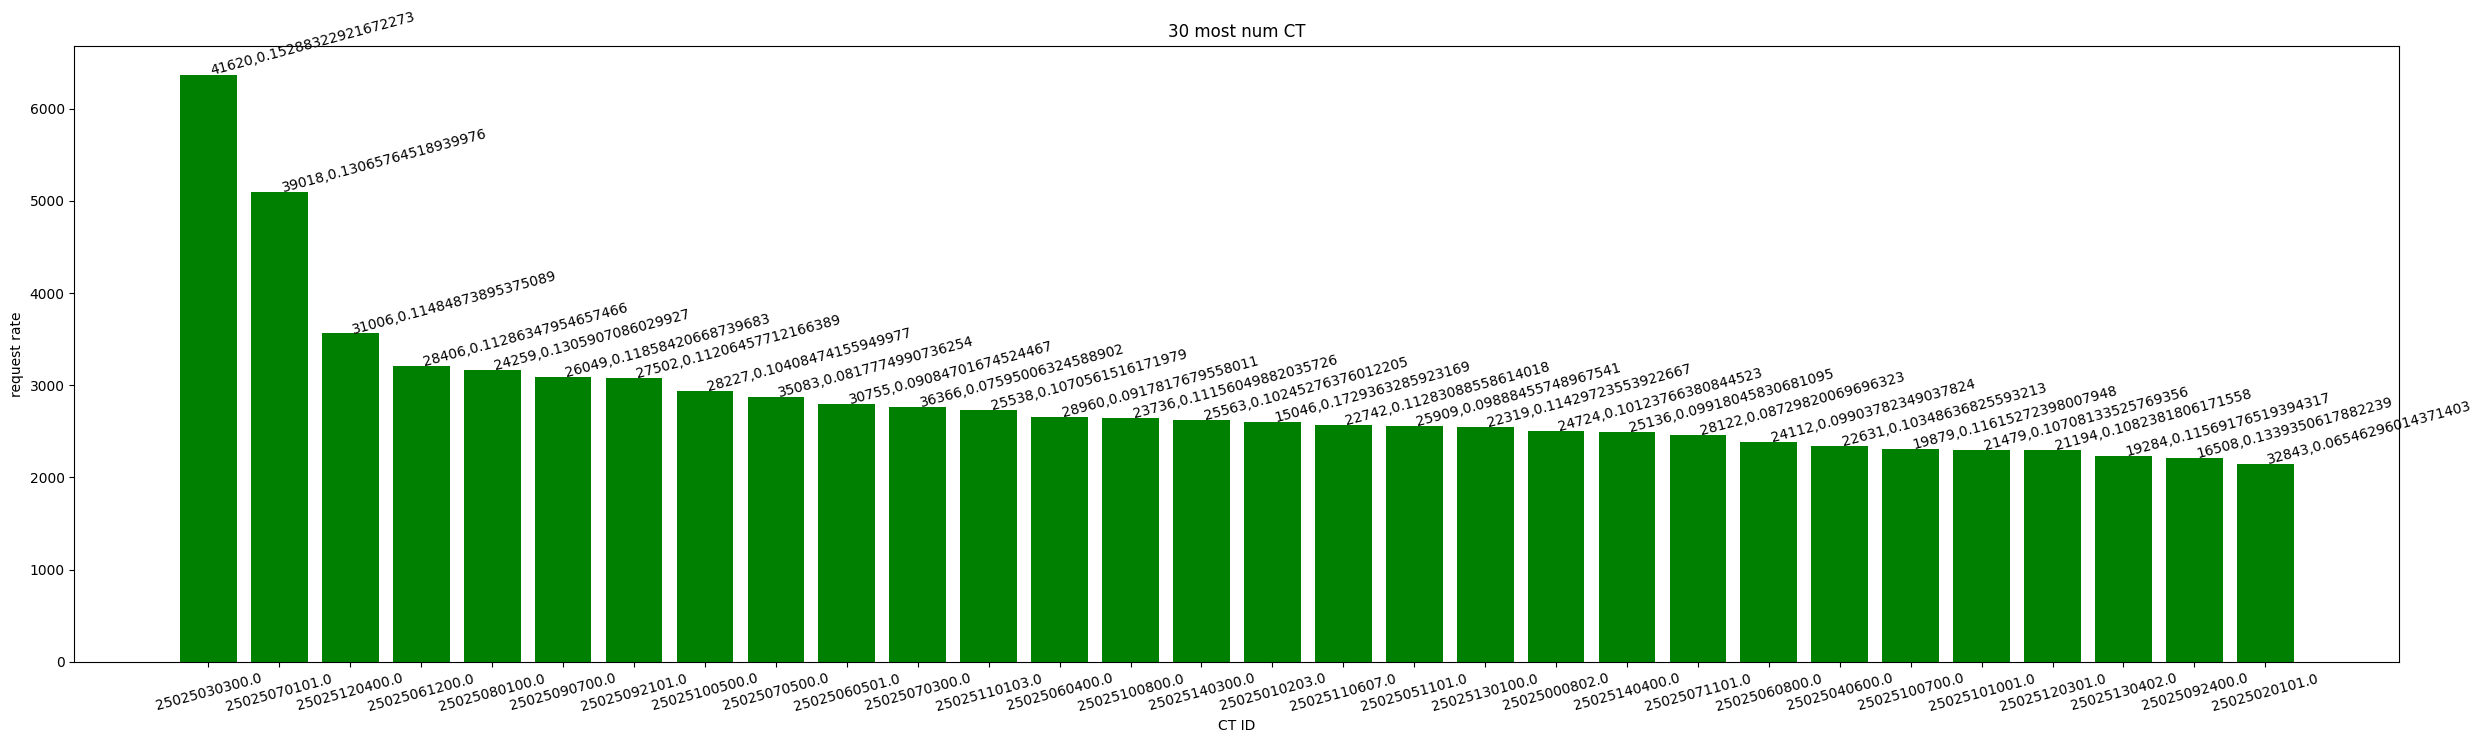

In [ ]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(30,8))
plt_keyset=[x[0] for x in most_group[:30]] #if x[1]>=500]#CT_ID
plt_total=[x[1] for x in most_group[:30]] # if x[1]>=500]#所有request数
plt_null=[x[2] for x in most_group[:30]] # if x[1]>=500]#最多的request
plt_ratio=[x[3] for x in most_group[:30]] # if x[1]>=500]#最多request的数量
#plt_ratio=[x[4] for x in ratio_group[:10]] # if x[1]>=500]#最多request占比
i=range(30)
plt.bar(i, plt_null, fc='g')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('30 most num CT')
#plt.legend()
plt.xticks(i,plt_keyset,rotation=15)
for i in range (30):
    plt.text(i+0.01,plt_null[i]+0.003,str(format(plt_total[i],'.0f'))+','+str(plt_ratio[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_clo_nums_CT.png")

#plt.figure(2)


#print(np.array(group))

In [ ]:
group=r0.groupby(['TYPE'])
cl_rt_ls=[]
for key,value in group:
  #clo_rnums=value["CLOSED_DT"].value_counts()
  #print(value["CLOSED_DT"].isna().sum())
  #print(value["CLOSED_DT"].shape[0])
  #num = clo_rnums.isna().sum()
  #print((value["CLOSED_DT"].shape[0]-value["CLOSED_DT"].isna().sum())/value["CLOSED_DT"].shape[0])
  cl_rt=[key,value["CLOSED_DT"].shape[0],value["CLOSED_DT"].isna().sum(),(value["CLOSED_DT"].isna().sum())/value["CLOSED_DT"].shape[0]]
  if cl_rt[1]>20 and key!="General Request":
      cl_rt_ls.append(cl_rt)
most_group=sorted(cl_rt_ls,key=(lambda x:x[2]),reverse=True)
ratio_group=sorted(cl_rt_ls,key=(lambda x:x[3]),reverse=True)

<ipython-input-107-cb9a0ca18dad>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key,value in group:


[['Request for Pothole Repair', 108017, 13980, 0.12942407213679327], ['Unsatisfactory Living Conditions', 36543, 13917, 0.38083901157540434], ['Animal Generic Request', 20982, 13568, 0.6466495091030408], ['General Comments For a Program or Policy', 27623, 13138, 0.47561814430003985], ['Sidewalk Repair (Make Safe)', 49125, 8002, 0.16289058524173028], ['Requests for Street Cleaning', 153910, 6658, 0.04325904749528946], ['Heat - Excessive, Insufficient', 12250, 6096, 0.4976326530612245], ['Graffiti Removal', 46051, 4864, 0.10562202775184035], ['Traffic Signal Inspection', 35164, 4843, 0.13772608349448298], ['Sidewalk Repair', 19112, 4545, 0.23780870657178735]]


<Figure size 640x480 with 0 Axes>

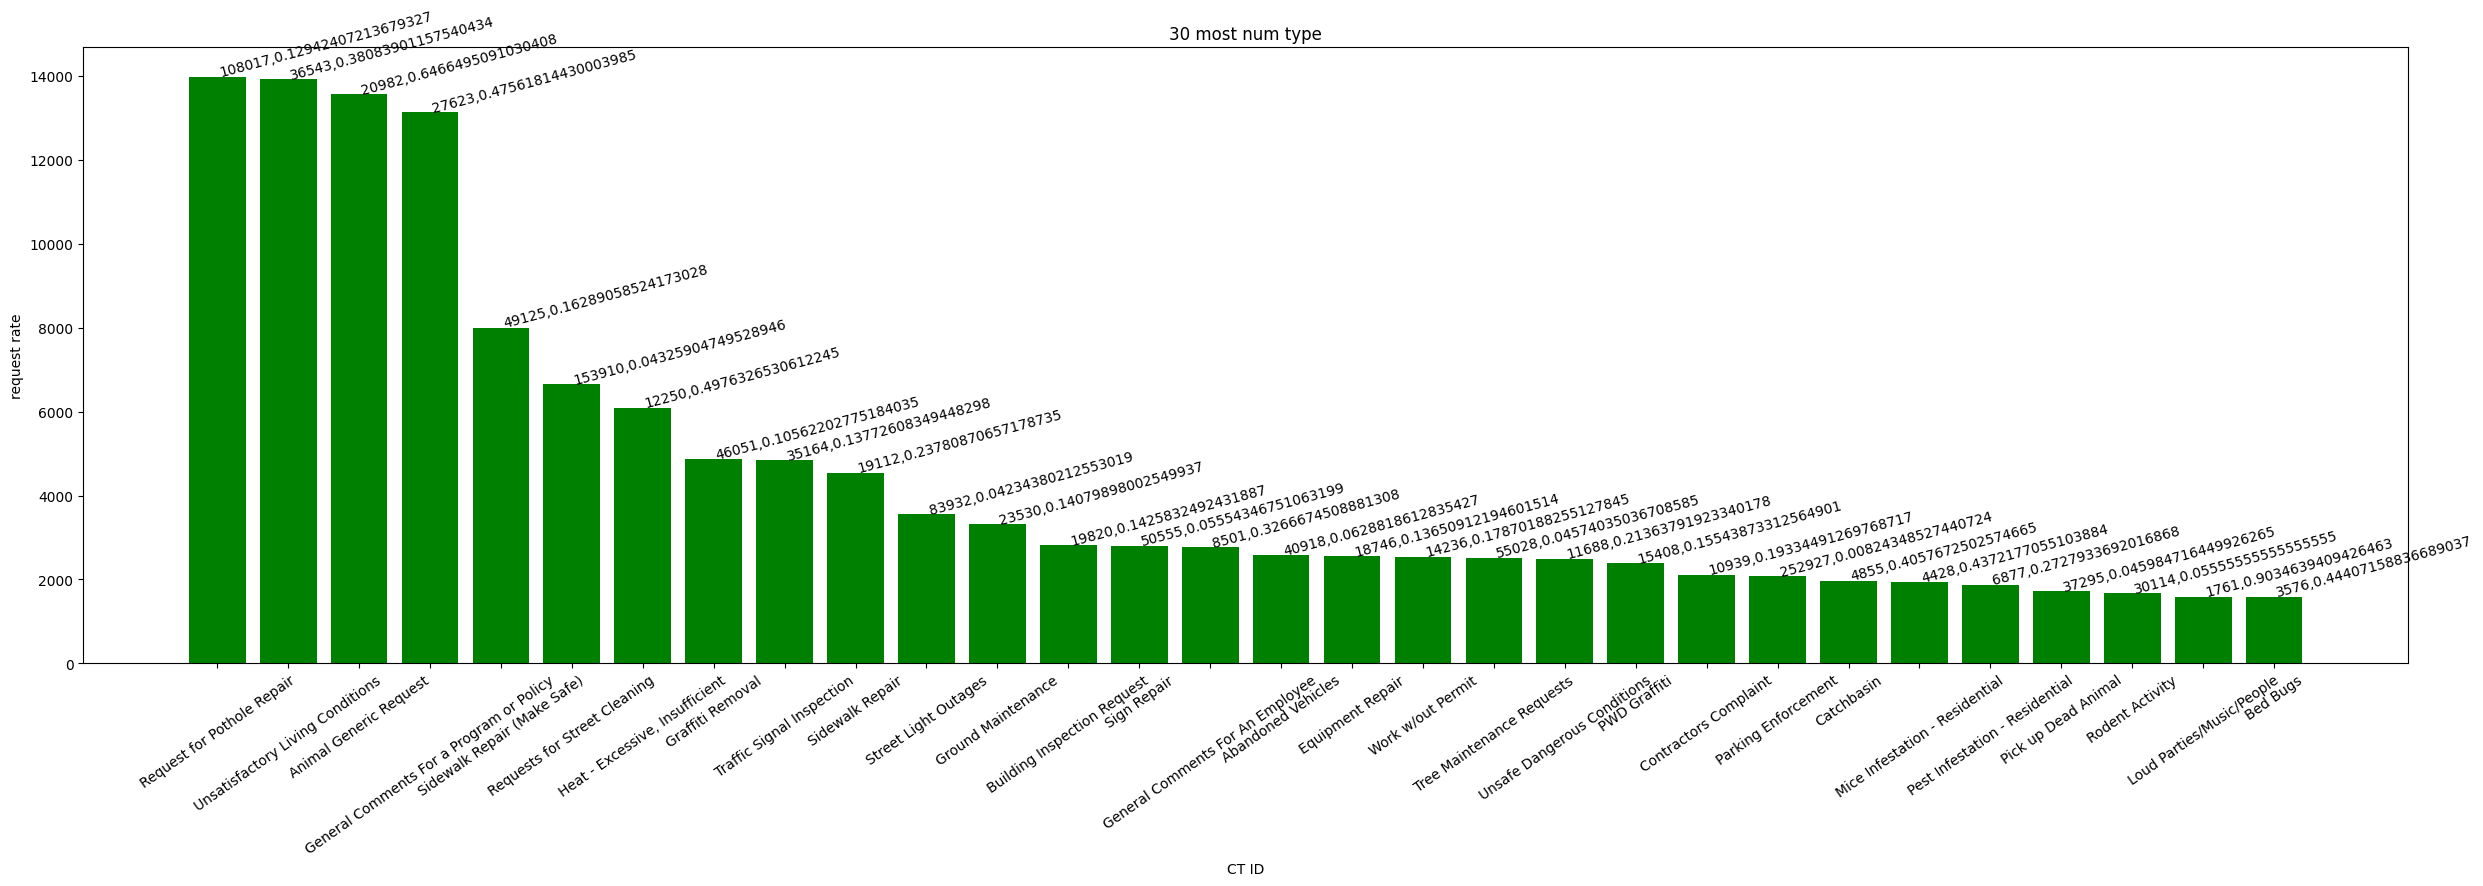

In [ ]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(30,8))
plt_keyset=[x[0] for x in most_group[:30]] #if x[1]>=500]#CT_ID
plt_total=[x[1] for x in most_group[:30]] # if x[1]>=500]#所有request数
plt_null=[x[2] for x in most_group[:30]] # if x[1]>=500]#最多的request
plt_ratio=[x[3] for x in most_group[:30]] # if x[1]>=500]#最多request的数量
#plt_ratio=[x[4] for x in ratio_group[:10]] # if x[1]>=500]#最多request占比
i=range(30)
plt.bar(i, plt_null, fc='g')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('30 most num type')
#plt.legend()
plt.xticks(i,plt_keyset,rotation=35)
for i in range (30):
    plt.text(i+0.01,plt_null[i]+0.003,str(format(plt_total[i],'.0f'))+','+str(plt_ratio[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_clo_nums_type.png")

#plt.figure(2)


#print(np.array(group))

[['Request for Pothole Repair', 108017, 13980, 0.12942407213679327], ['Unsatisfactory Living Conditions', 36543, 13917, 0.38083901157540434], ['Animal Generic Request', 20982, 13568, 0.6466495091030408], ['General Comments For a Program or Policy', 27623, 13138, 0.47561814430003985], ['Sidewalk Repair (Make Safe)', 49125, 8002, 0.16289058524173028], ['Requests for Street Cleaning', 153910, 6658, 0.04325904749528946], ['Heat - Excessive, Insufficient', 12250, 6096, 0.4976326530612245], ['Graffiti Removal', 46051, 4864, 0.10562202775184035], ['Traffic Signal Inspection', 35164, 4843, 0.13772608349448298], ['Sidewalk Repair', 19112, 4545, 0.23780870657178735]]


<Figure size 640x480 with 0 Axes>

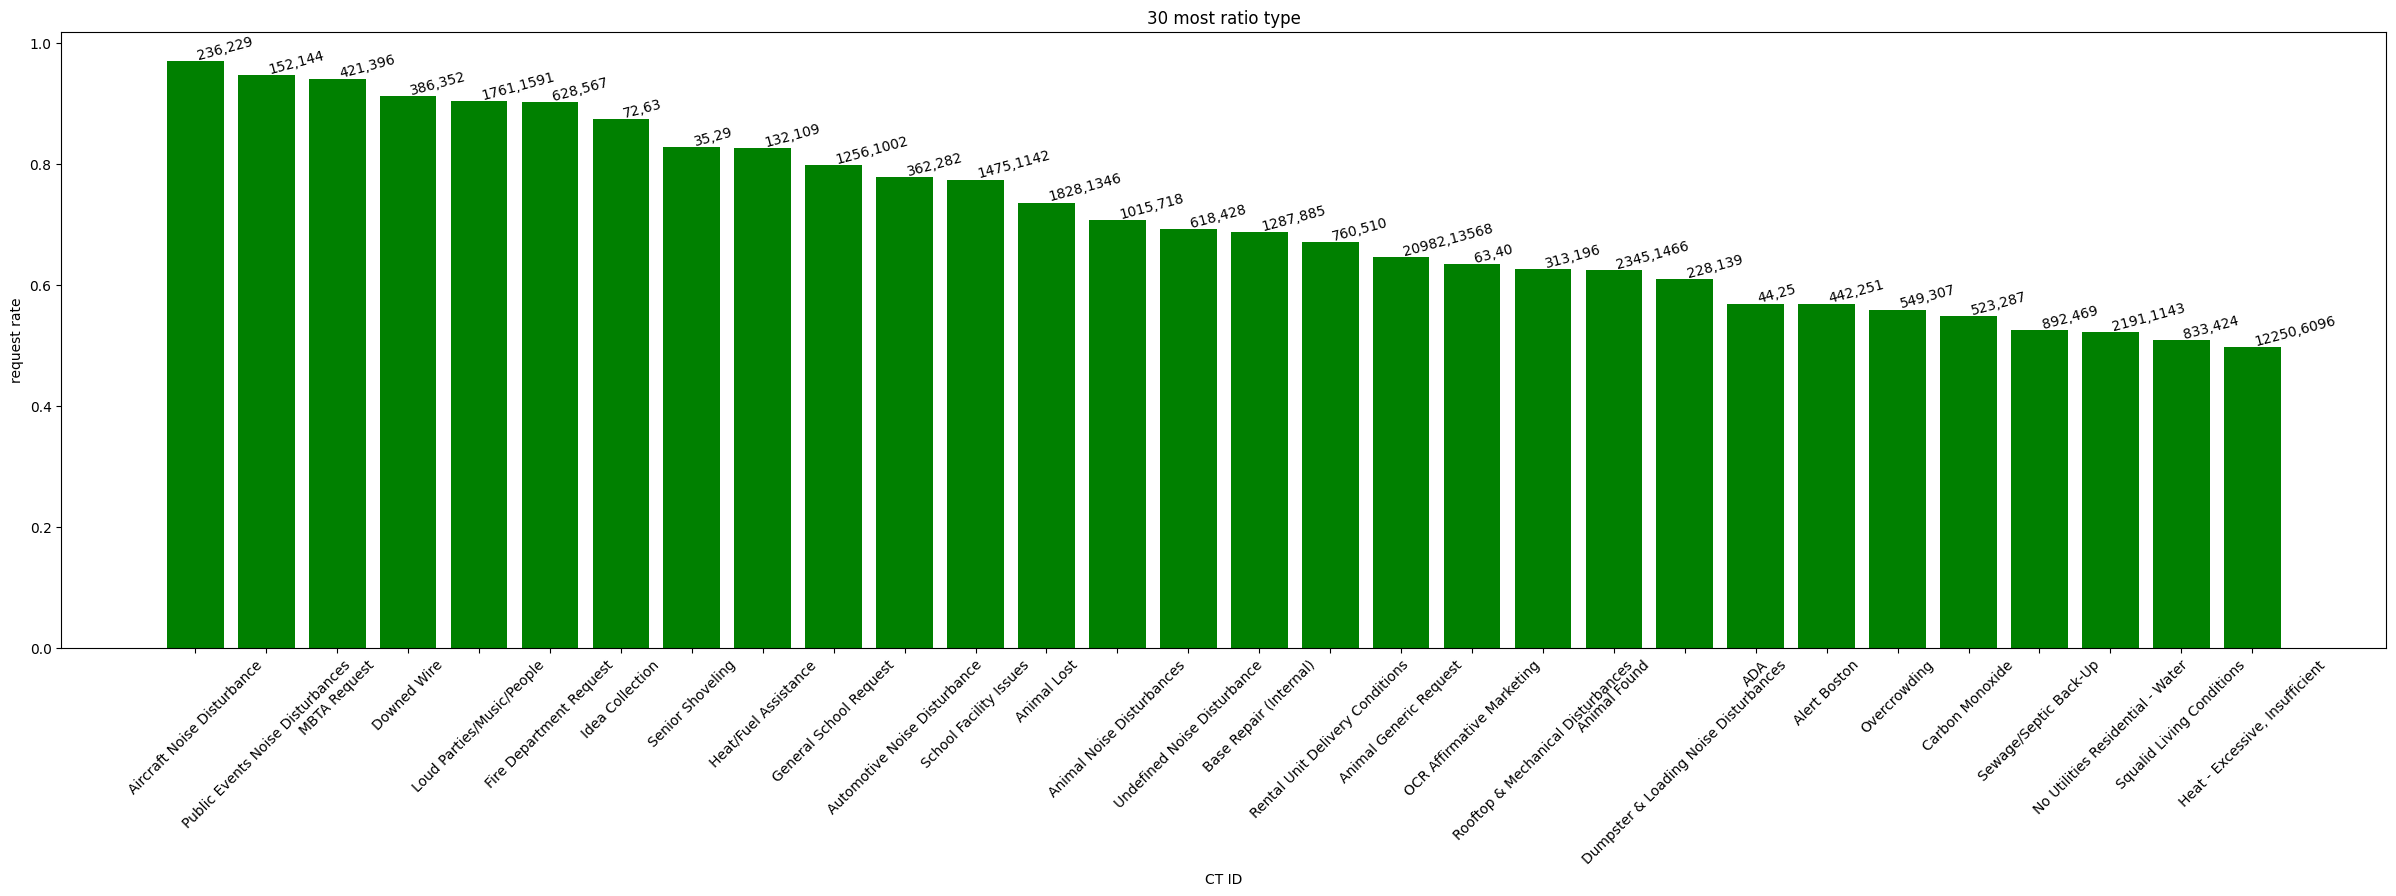

In [ ]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(30,8))
plt_keyset=[x[0] for x in ratio_group[:30]] #if x[1]>=500]#CT_ID
plt_total=[x[1] for x in ratio_group[:30]] # if x[1]>=500]#所有request数
plt_null=[x[2] for x in ratio_group[:30]] # if x[1]>=500]#最多的request
plt_ratio=[x[3] for x in ratio_group[:30]] # if x[1]>=500]#最多request的数量
#plt_ratio=[x[4] for x in ratio_group[:10]] # if x[1]>=500]#最多request占比
i=range(30)
plt.bar(i, plt_ratio, fc='g')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('30 most ratio type')
#plt.legend()
plt.xticks(i,plt_keyset,rotation=45)
for i in range (30):
    plt.text(i+0.01,plt_ratio[i]+0.003,str(format(plt_total[i],'.0f'))+','+str(plt_null[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_clo_ratio_Type.png")

#plt.figure(2)


#print(np.array(group))

In [ ]:
group=r0.groupby(['TYPE','CT_ID_10'])
cl_rt_ls=[]
for key,value in group:
  #clo_rnums=value["CLOSED_DT"].value_counts()
  #print(value["CLOSED_DT"].isna().sum())
  #print(value["CLOSED_DT"].shape[0])
  #num = clo_rnums.isna().sum()
  #print((value["CLOSED_DT"].shape[0]-value["CLOSED_DT"].isna().sum())/value["CLOSED_DT"].shape[0])
  cl_rt=[key,value["CLOSED_DT"].shape[0],value["CLOSED_DT"].isna().sum(),(value["CLOSED_DT"].isna().sum())/value["CLOSED_DT"].shape[0]]
  if cl_rt[1]>20 and key[0]!="General Request":
      cl_rt_ls.append(cl_rt)
most_group=sorted(cl_rt_ls,key=(lambda x:x[2]),reverse=True)
ratio_group=sorted(cl_rt_ls,key=(lambda x:x[3]),reverse=True)
#r.columns#['Unnamed: 0.1', 'Unnamed: 0', 'TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT','LOCATION', 'OPEN_DT', 'REASON', 'SOURCE', 'SUBJECT', 'LocationID', 'X','Y', 'TLID', 'BLK_ID_10', 'BG_ID_10', 'CT_ID_10', 'NSA_NAME', 'BRA_PD','ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI','TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM', 'propid'],dtype='object'

[[('Requests for Street Cleaning', 25025080100.0), 2069, 312, 0.15079748670855486], [('Unsatisfactory Living Conditions', 25025101102.0), 764, 301, 0.39397905759162305], [('Unsatisfactory Living Conditions', 25025090100.0), 839, 298, 0.35518474374255066], [('Unsatisfactory Living Conditions', 25025092400.0), 848, 293, 0.3455188679245283], [('Request for Pothole Repair', 25025130402.0), 967, 266, 0.2750775594622544], [('Request for Pothole Repair', 25025070101.0), 2195, 265, 0.12072892938496584], [('Unsatisfactory Living Conditions', 25025100100.0), 743, 265, 0.3566621803499327], [('Request for Pothole Repair', 25025081100.0), 861, 246, 0.2857142857142857], [('Unsatisfactory Living Conditions', 25025100500.0), 669, 240, 0.35874439461883406], [('Request for Pothole Repair', 25025081001.0), 1364, 233, 0.17082111436950145]]


<Figure size 640x480 with 0 Axes>

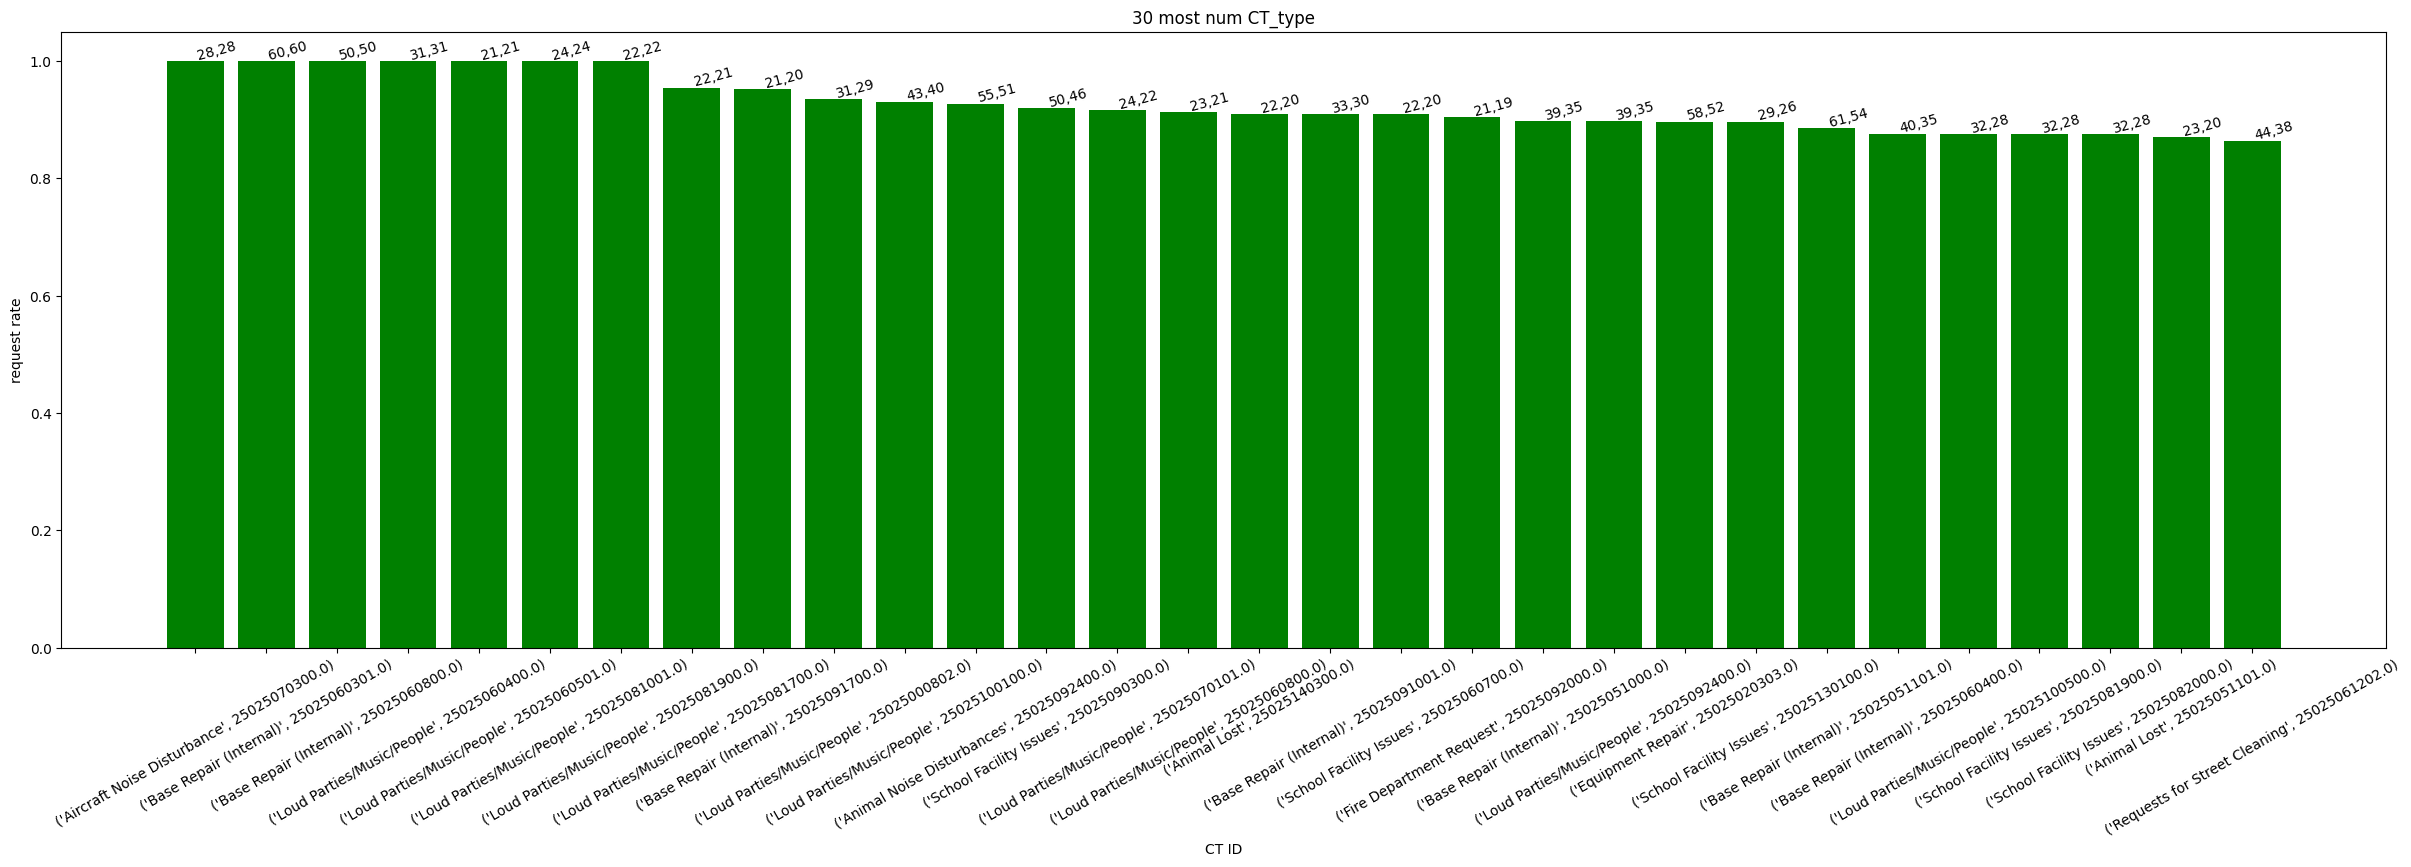

In [ ]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(30,8))
plt_keyset=[x[0] for x in ratio_group[:30]] #if x[1]>=500]#CT_ID
plt_total=[x[1] for x in ratio_group[:30]] # if x[1]>=500]#所有request数
plt_null=[x[2] for x in ratio_group[:30]] # if x[1]>=500]#最多的request
plt_ratio=[x[3] for x in ratio_group[:30]] # if x[1]>=500]#最多request的数量
#plt_ratio=[x[4] for x in ratio_group[:10]] # if x[1]>=500]#最多request占比
i=range(30)
plt.bar(i, plt_ratio, fc='g')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('30 most num CT_type')
#plt.legend()
plt.xticks(i,plt_keyset,rotation=30)
for i in range (30):
    plt.text(i+0.01,plt_ratio[i]+0.003,str(format(plt_total[i],'.0f'))+','+str(plt_null[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_clo_ratio_all.png")

#plt.figure(2)


#print(np.array(group))

[[('Requests for Street Cleaning', 25025080100.0), 2069, 312, 0.15079748670855486], [('Unsatisfactory Living Conditions', 25025101102.0), 764, 301, 0.39397905759162305], [('Unsatisfactory Living Conditions', 25025090100.0), 839, 298, 0.35518474374255066], [('Unsatisfactory Living Conditions', 25025092400.0), 848, 293, 0.3455188679245283], [('Request for Pothole Repair', 25025130402.0), 967, 266, 0.2750775594622544], [('Request for Pothole Repair', 25025070101.0), 2195, 265, 0.12072892938496584], [('Unsatisfactory Living Conditions', 25025100100.0), 743, 265, 0.3566621803499327], [('Request for Pothole Repair', 25025081100.0), 861, 246, 0.2857142857142857], [('Unsatisfactory Living Conditions', 25025100500.0), 669, 240, 0.35874439461883406], [('Request for Pothole Repair', 25025081001.0), 1364, 233, 0.17082111436950145]]


<Figure size 640x480 with 0 Axes>

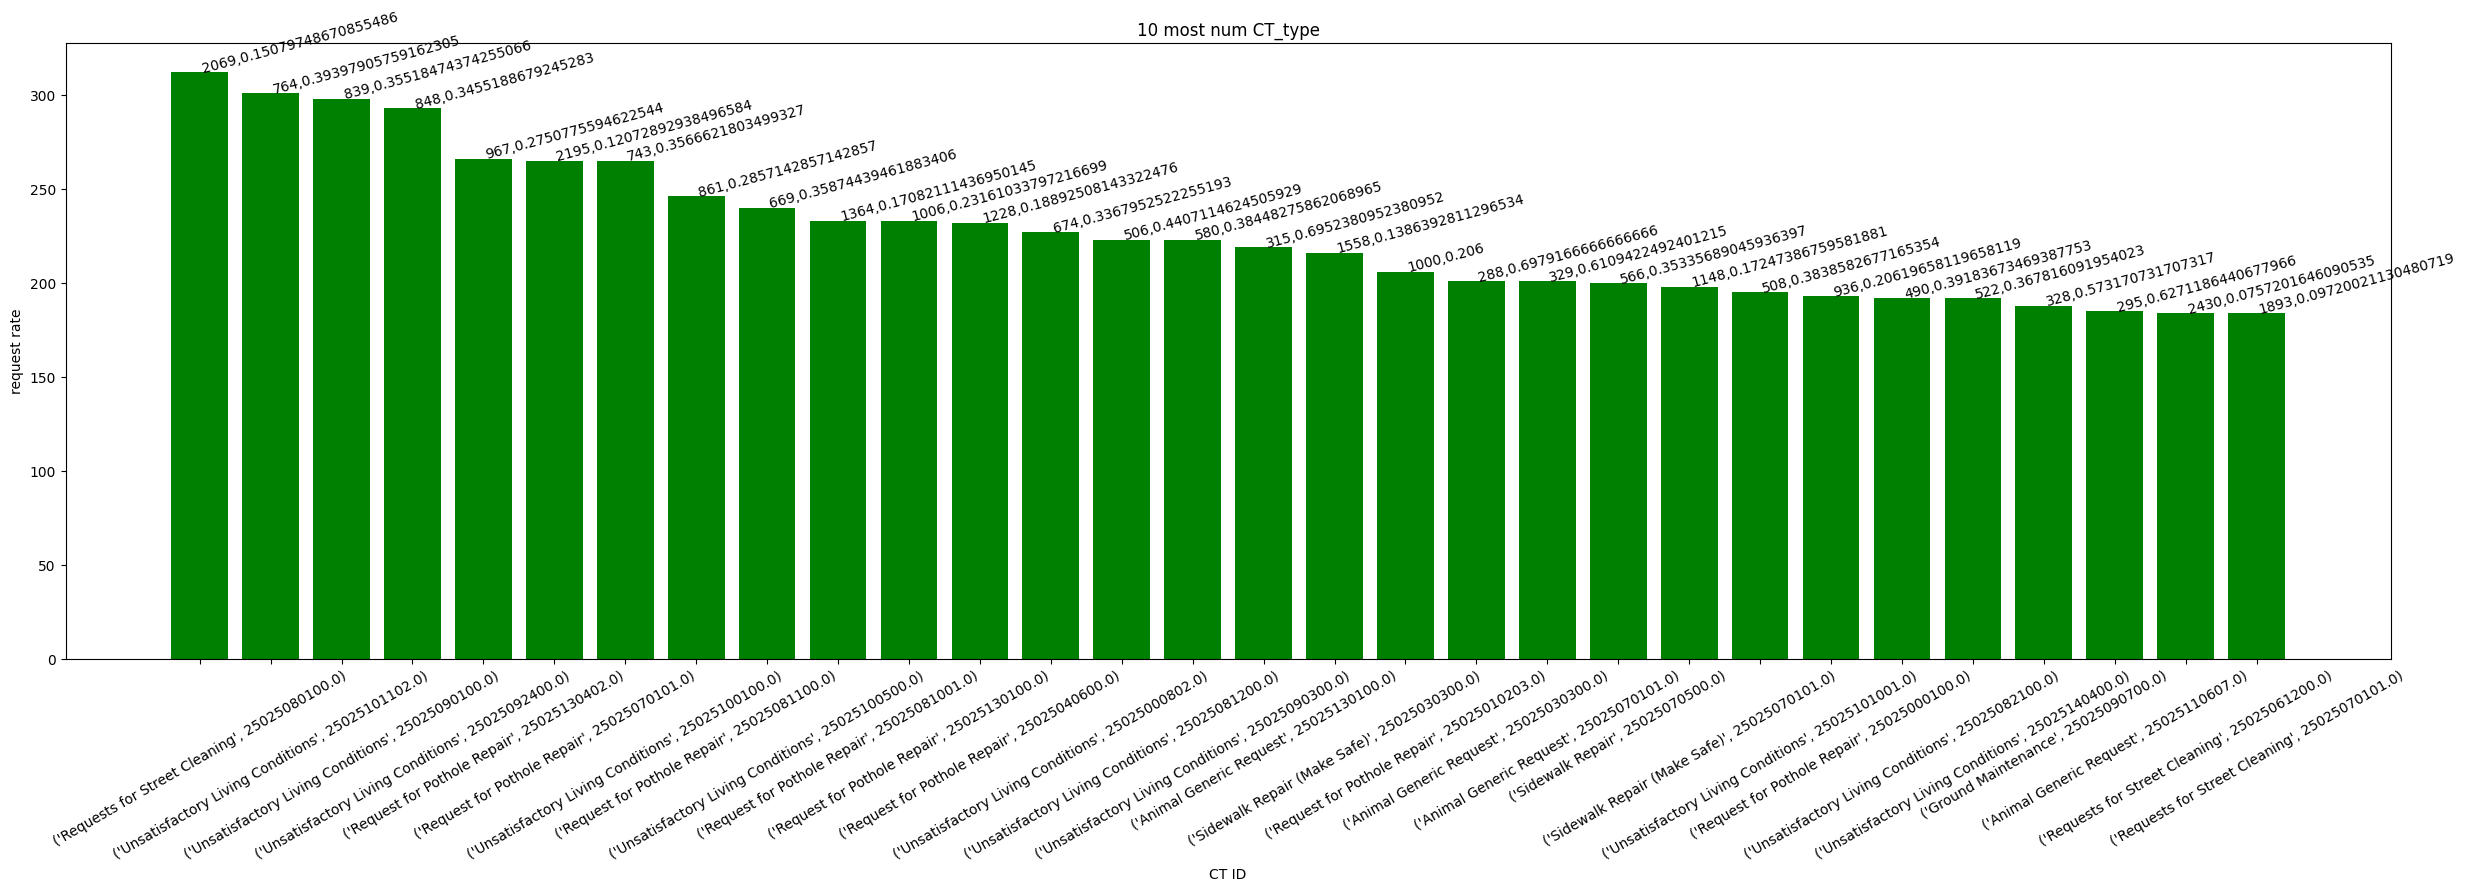

In [ ]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(30,8))
plt_keyset=[x[0] for x in most_group[:30]] #if x[1]>=500]#CT_ID
plt_total=[x[1] for x in most_group[:30]] # if x[1]>=500]#所有request数
plt_null=[x[2] for x in most_group[:30]] # if x[1]>=500]#最多的request
plt_ratio=[x[3] for x in most_group[:30]] # if x[1]>=500]#最多request的数量
#plt_ratio=[x[4] for x in ratio_group[:10]] # if x[1]>=500]#最多request占比
i=range(30)
plt.bar(i, plt_null, fc='g')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('10 most num CT_type')
#plt.legend()
plt.xticks(i,plt_keyset,rotation=30)
for i in range (30):
    plt.text(i+0.01,plt_null[i]+0.003,str(format(plt_total[i],'.0f'))+','+str(plt_ratio[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_clo_nums_all.png")

#plt.figure(2)


#print(np.array(group))

In [ ]:
sort_rnums=r["CT_ID_10"].value_counts()

print(sort_rnums)


NameError: ignored

In [ ]:
#np.array(ind.nlargest(10,"OlderAdult")["GEOID10(census tract)"])

total_sort=ind.sort_values("total")

In [ ]:
sort_rnums=r["CT_ID_10"].value_counts()
#print(sort_rnums)
#for row in sort_rnums.iterrows():
CT_all=np.array(ind["GEOID10(census tract)"])
#print(CT_all)
list_all=[]

for i in range(len(CT_all)):
  CTID=CT_all[i]
  nums=sort_rnums[CTID]
  total=ind.loc[ind["GEOID10(census tract)" ]==CTID]['total'].values[0]
  list0=[CTID,nums,total]
  list_all.append(list0)
total_requests=sorted(list_all,key=(lambda x:x[2]))
#print(total_requests)
popu_all=[]
for i in range(len(CT_all)):
  CTID=CT_all[i]
  nums=sort_rnums[CTID]
  popu=ind.loc[ind["GEOID10(census tract)" ]==CTID]['POP100_RE'].values[0]
  list0=[CTID,nums,popu]
  popu_all.append(list0)
popu_requests=sorted(popu_all,key=(lambda x:x[2]))
print(popu_requests)


[[25025981600, 106, 0], [25025981201, 2016, 0], [25025981700, 3906, 0], [25025980700, 1110, 6], [25025981502, 91, 9], [25025981501, 795, 12], [25025981000, 1237, 22], [25025981800, 3383, 82], [25025981202, 2067, 207], [25025980300, 3117, 338], [25025981300, 1174, 389], [25025981100, 2661, 418], [25025980101, 3, 535], [25025020302, 9736, 1181], [25025010408, 2271, 1426], [25025120103, 7447, 1508], [25025040200, 5817, 1606], [25025030200, 13630, 1665], [25025070402, 5982, 1723], [25025080300, 8738, 1769], [25025050500, 6385, 1857], [25025060700, 2373, 1893], [25025140106, 2054, 1901], [25025100603, 10156, 1904], [25025060200, 13279, 1916], [25025030100, 14398, 1954], [25025120700, 7493, 2014], [25025020301, 3763, 2023], [25025110201, 8715, 2051], [25025050600, 9682, 2063], [25025140201, 8623, 2072], [25025120104, 8767, 2095], [25025081500, 9662, 2134], [25025040100, 11966, 2168], [25025000503, 4599, 2211], [25025061101, 3546, 2232], [25025090200, 8455, 2233], [25025070600, 16205, 2240], 

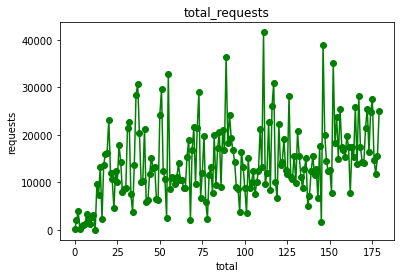

In [ ]:
plt.figure(1)
#fig = plt.figure(figsize=(12,12))
i=range(len(total_requests))
plt_req=[x[1] for x in total_requests]
plt.plot(i, plt_req, color='green', marker='o', linestyle='solid')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('total_requests')
#plt.legend()
#plt.xticks(i,plt_CTID,rotation=15)
#for i in range (10):
#    plt.text(i+0.01,plt_ratio[i]+0.003,str(format(plt_most[i],'.0f'))+','+str(plt_most_key[i]),rotation=15)
plt.xlabel('total')
plt.ylabel('requests')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/total_requests.png")

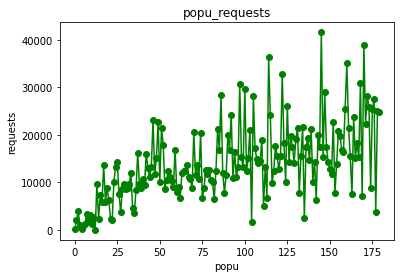

In [ ]:
plt.figure(1)
#fig = plt.figure(figsize=(12,12))
i=range(len(popu_requests))
plt_req=[x[1] for x in popu_requests]
plt.plot(i, plt_req, color='green', marker='o', linestyle='solid')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('popu_requests')
#plt.legend()
#plt.xticks(i,plt_CTID,rotation=15)
#for i in range (10):
#    plt.text(i+0.01,plt_ratio[i]+0.003,str(format(plt_most[i],'.0f'))+','+str(plt_most_key[i]),rotation=15)
plt.xlabel('popu')
plt.ylabel('requests')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/popu_requests.png")

In [ ]:
CT_ID=np.array(ind["GEOID10(census tract)"])
points=[]
for i in range (len(CT_ID)):
  point=[CT_ID[i],0]
  points.append(point)
oa=np.array(ind.nlargest(30, "OlderAdult")["GEOID10(census tract)"])
for i in range (len(points)):
  if points[i][0] in oa:
    points[i][1]+=1
td=np.array(ind.nlargest(30, "TotDis")["GEOID10(census tract)"])
for i in range (len(points)):
  if points[i][0] in td:
    points[i][1]+=1
tc=np.array(ind.nlargest(30, "TotChild")["GEOID10(census tract)"])
for i in range (len(points)):
  if points[i][0] in tc:
    points[i][1]+=1
ln=np.array(ind.nlargest(30, "Low_to_No")["GEOID10(census tract)"])
for i in range (len(points)):
  if points[i][0] in tc:
    points[i][1]+=1
le=np.array(ind.nlargest(30, "LEP")["GEOID10(census tract)"])
for i in range (len(points)):
  if points[i][0] in le:
    points[i][1]+=1
po=np.array(ind.nlargest(30, "POC2")["GEOID10(census tract)"])
for i in range (len(points)):
  if points[i][0] in le:
    points[i][1]+=1
md=np.array(ind.nlargest(30, "MedIllnes")["GEOID10(census tract)"])
for i in range (len(points)):
  if points[i][0] in md:
    points[i][1]+=1
points_requests=[]
for i in range (len(points)):
  CTID=points[i][0]
  nums=sort_rnums[CTID]
  point=[points[i][0],points[i][1],nums]
  points_requests.append(point)
points_requests=sorted(points_requests,key=(lambda x:x[1]))
print(points_requests)

[[25025010801, 0, 7986], [25025010702, 0, 23186], [25025010204, 0, 6536], [25025010802, 0, 13691], [25025010104, 0, 14357], [25025000703, 0, 6795], [25025000704, 0, 10053], [25025010103, 0, 2593], [25025980300, 0, 3117], [25025120201, 0, 16505], [25025120104, 0, 8767], [25025000302, 0, 10431], [25025000301, 0, 10379], [25025140201, 0, 8623], [25025140102, 0, 19053], [25025120700, 0, 7493], [25025120600, 0, 10738], [25025120500, 0, 8790], [25025110502, 0, 17150], [25025110501, 0, 12049], [25025110401, 0, 13233], [25025101101, 0, 10064], [25025100900, 0, 17697], [25025981600, 0, 106], [25025030400, 0, 21551], [25025981300, 0, 1174], [25025110301, 0, 11775], [25025140106, 0, 2054], [25025010701, 0, 17833], [25025010408, 0, 2271], [25025000503, 0, 4599], [25025030200, 0, 13630], [25025030100, 0, 14398], [25025020200, 0, 29618], [25025010500, 0, 11667], [25025010300, 0, 6245], [25025000701, 0, 7833], [25025981201, 0, 2016], [25025981501, 0, 795], [25025981700, 0, 3906], [25025981800, 0, 338

In [ ]:
from itertools import combinations_with_replacement
p=[]
pe=[]
for x1 in range(3):
  for x2 in range(3):
    for x3 in range(3):
      for x4 in range(3):
        for x5 in range(3):
          for x6 in range(3):
            for x7 in range(3):
              p.append([x1+1,x2+1,x3+1,x4+1,x5+1,x6+1,x7+1])
print(p)
apply=[24,30,36,42]
p=[[1, 1, 1, 1, 1, 3, 3]]
apply=[24]

[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 3], [1, 1, 1, 1, 1, 2, 1], [1, 1, 1, 1, 1, 2, 2], [1, 1, 1, 1, 1, 2, 3], [1, 1, 1, 1, 1, 3, 1], [1, 1, 1, 1, 1, 3, 2], [1, 1, 1, 1, 1, 3, 3], [1, 1, 1, 1, 2, 1, 1], [1, 1, 1, 1, 2, 1, 2], [1, 1, 1, 1, 2, 1, 3], [1, 1, 1, 1, 2, 2, 1], [1, 1, 1, 1, 2, 2, 2], [1, 1, 1, 1, 2, 2, 3], [1, 1, 1, 1, 2, 3, 1], [1, 1, 1, 1, 2, 3, 2], [1, 1, 1, 1, 2, 3, 3], [1, 1, 1, 1, 3, 1, 1], [1, 1, 1, 1, 3, 1, 2], [1, 1, 1, 1, 3, 1, 3], [1, 1, 1, 1, 3, 2, 1], [1, 1, 1, 1, 3, 2, 2], [1, 1, 1, 1, 3, 2, 3], [1, 1, 1, 1, 3, 3, 1], [1, 1, 1, 1, 3, 3, 2], [1, 1, 1, 1, 3, 3, 3], [1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 2, 1, 1, 2], [1, 1, 1, 2, 1, 1, 3], [1, 1, 1, 2, 1, 2, 1], [1, 1, 1, 2, 1, 2, 2], [1, 1, 1, 2, 1, 2, 3], [1, 1, 1, 2, 1, 3, 1], [1, 1, 1, 2, 1, 3, 2], [1, 1, 1, 2, 1, 3, 3], [1, 1, 1, 2, 2, 1, 1], [1, 1, 1, 2, 2, 1, 2], [1, 1, 1, 2, 2, 1, 3], [1, 1, 1, 2, 2, 2, 1], [1, 1, 1, 2, 2, 2, 2], [1, 1, 1, 2, 2, 2, 3], [1, 1, 1, 2, 2, 3, 1], [1, 1, 1, 

In [ ]:
from collections import Counter
from itertools import product as pro
from itertools import groupby
CT_ID=np.array(ind["GEOID10(census tract)"])
points=[]
for i in range (len(CT_ID)):
  point=[CT_ID[i],0]
  points.append(point)
sols=[]
result=[]
stage=[]
best_grade=0#best grade till now
best_sol=[]#best combination till now
best_sol_ratio=[]
best_ratio=0#best ratio of right points
#for j in range (12):
for rang in apply:
  for weights in p:
    oa=np.array(ind.nlargest(rang, "OlderAdult")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in oa:
        points[i][1]+=weights[0]
    td=np.array(ind.nlargest(rang, "TotDis")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in td:
        points[i][1]+=weights[1]
    tc=np.array(ind.nlargest(rang, "TotChild")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in tc:
        points[i][1]+=weights[2]
    ln=np.array(ind.nlargest(rang, "Low_to_No")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in ln:
        points[i][1]+=weights[3]
    le=np.array(ind.nlargest(rang, "LEP")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in le:
        points[i][1]+=weights[4]
    po=np.array(ind.nlargest(rang, "POC2")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in po:
        points[i][1]+=weights[5]
    md=np.array(ind.nlargest(rang, "MedIllnes")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in md:
        points[i][1]+=weights[6]
    #points_requests=[]
    points_index={}#point nums
    points_point=[x[1]for x in points]#all points
    grade=0#how well it performs
    all=0#all unzero points
    a=set(points_point)
    for i in a :
      points_index[i]=points_point.count(i)
    pi_keys=sorted(a)
    pts_range={}
    for i in range (len(pi_keys)):
      if i==0:
        start=0
        end=points_index[pi_keys[i]]-1
        pts_range[pi_keys[i]]=[start,end]
      else:
        start=pts_range[pi_keys[i-1]][1]+1
        end=pts_range[pi_keys[i-1]][1]+points_index[pi_keys[i]]
        pts_range[pi_keys[i]]=[start,end]
    points_requests=[]
    for i in range (len(points)):
      CTID=points[i][0]
      ratio_cy=sort_rnums[CTID]
      point=[points[i][0],points[i][1],ratio_cy]
      points_requests.append(point)
    points_requests=sorted(points_requests,key=(lambda x:x[2]))
    #print(points_requests)
    for i in range(len(points_requests)):
      if points_requests[i][1]!=0:
        all+=1
        if pts_range[points_requests[i][1]][0]<=i and pts_range[points_requests[i][1]][1]>=i:
          grade+=1
    ratio=grade/all
    sols.append([grade,rang,weights])
    if grade>=best_grade:
      best_grade=grade
      best_sol=[rang,weights]
      print(best_grade)
      print(best_sol)
    if ratio>=best_ratio:
      best_ratio=ratio
      best_sol_ratio=[rang,weights]
      print(best_ratio)
      print(best_sol_ratio)
points_requests=sorted(points_requests,key=(lambda x:x[1]))

4
[24, [1, 1, 1, 1, 1, 3, 3]]
0.06779661016949153
[24, [1, 1, 1, 1, 1, 3, 3]]


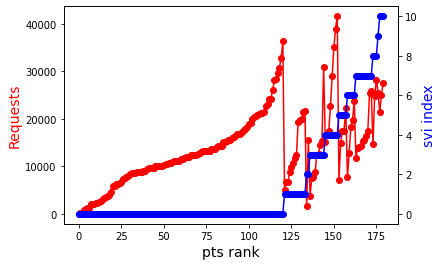

In [ ]:
# create figure and axis objects with subplots()
plt_req=[x[2] for x in points_requests]
plt_pts=[x[1] for x in points_requests]
fig,ax = plt.subplots()
i = range(len(points_requests))
# make a plot
ax.plot(i, 
        plt_req,
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("pts rank", fontsize = 14)
# set y-axis label
ax.set_ylabel("Requests",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(i, plt_pts,color="blue",marker="o")
ax2.set_ylabel("svi index",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('/content/drive/MyDrive/sparkfigs/index_request_nums.png')
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

In [ ]:
#get all stuff with ratio 
ratio_reqs={}
for CT in CT_all:
  popu=ind.loc[ind["GEOID10(census tract)"]==CT]["POP100_RE"].values[0]
  request=sort_rnums[CT]
  ratio=request/popu
  if ratio<=20:
      ratio_reqs[CT]=ratio
print(ratio_reqs)

{25025010405: 1.3549438609199564, 25025010404: 1.24411208526732, 25025010801: 2.869565217391304, 25025010702: 9.660833333333333, 25025010204: 2.059880239520958, 25025010802: 4.475645635828702, 25025010104: 2.988551207327227, 25025000703: 2.434611250447868, 25025000504: 2.5675025075225677, 25025000704: 2.093938762757759, 25025010103: 0.5675202451302255, 25025000803: 0.5593863912515188, 25025980300: 9.221893491124261, 25025120201: 4.799360279150916, 25025120104: 4.18472553699284, 25025110607: 4.479416978530629, 25025000302: 3.3198599618077655, 25025000301: 3.787956204379562, 25025140400: 3.285751633986928, 25025140300: 4.00548417424005, 25025140201: 4.161679536679537, 25025140202: 3.275892857142857, 25025140102: 4.329243353783231, 25025100800: 4.279841327082582, 25025100601: 4.022312766783081, 25025100500: 4.713140758056436, 25025100400: 3.5687564234326823, 25025100300: 3.477747502270663, 25025130402: 4.158723312486521, 25025130300: 4.85856528626386, 25025130200: 4.790723479804705, 25025

<ipython-input-105-a1a596bdcd59>:6: RuntimeWarning: divide by zero encountered in long_scalars
  ratio=request/popu


In [ ]:
from itertools import combinations_with_replacement
p=[]
pe=[]
for x1 in range(3):
  for x2 in range(3):
    for x3 in range(3):
      for x4 in range(3):
        for x5 in range(3):
          for x6 in range(3):
            for x7 in range(3):
              p.append([x1+1,x2+1,x3+1,x4+1,x5+1,x6+1,x7+1])
print(p)
apply=[24,30,36,42]
p=[[1,1,1,1,1,1,3]]
apply=[24]

[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 3], [1, 1, 1, 1, 1, 2, 1], [1, 1, 1, 1, 1, 2, 2], [1, 1, 1, 1, 1, 2, 3], [1, 1, 1, 1, 1, 3, 1], [1, 1, 1, 1, 1, 3, 2], [1, 1, 1, 1, 1, 3, 3], [1, 1, 1, 1, 2, 1, 1], [1, 1, 1, 1, 2, 1, 2], [1, 1, 1, 1, 2, 1, 3], [1, 1, 1, 1, 2, 2, 1], [1, 1, 1, 1, 2, 2, 2], [1, 1, 1, 1, 2, 2, 3], [1, 1, 1, 1, 2, 3, 1], [1, 1, 1, 1, 2, 3, 2], [1, 1, 1, 1, 2, 3, 3], [1, 1, 1, 1, 3, 1, 1], [1, 1, 1, 1, 3, 1, 2], [1, 1, 1, 1, 3, 1, 3], [1, 1, 1, 1, 3, 2, 1], [1, 1, 1, 1, 3, 2, 2], [1, 1, 1, 1, 3, 2, 3], [1, 1, 1, 1, 3, 3, 1], [1, 1, 1, 1, 3, 3, 2], [1, 1, 1, 1, 3, 3, 3], [1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 2, 1, 1, 2], [1, 1, 1, 2, 1, 1, 3], [1, 1, 1, 2, 1, 2, 1], [1, 1, 1, 2, 1, 2, 2], [1, 1, 1, 2, 1, 2, 3], [1, 1, 1, 2, 1, 3, 1], [1, 1, 1, 2, 1, 3, 2], [1, 1, 1, 2, 1, 3, 3], [1, 1, 1, 2, 2, 1, 1], [1, 1, 1, 2, 2, 1, 2], [1, 1, 1, 2, 2, 1, 3], [1, 1, 1, 2, 2, 2, 1], [1, 1, 1, 2, 2, 2, 2], [1, 1, 1, 2, 2, 2, 3], [1, 1, 1, 2, 2, 3, 1], [1, 1, 1, 

In [ ]:
from collections import Counter
from itertools import product as pro
from itertools import groupby
CT_ID=np.array(ind["GEOID10(census tract)"])
points=[]
for i in range (len(CT_ID)):
  point=[CT_ID[i],0]
  points.append(point)
sols=[]
result=[]
stage=[]
best_grade=0#best grade till now
best_sol=[]#best combination till now
best_sol_ratio=[]
best_ratio=0#best ratio of right points
#for j in range (12):
for rang in apply:
  for weights in p:
    oa=np.array(ind.nlargest(rang, "ratio_oad")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in oa:
        points[i][1]+=weights[0]
    td=np.array(ind.nlargest(rang, "ratio_dis")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in td:
        points[i][1]+=weights[1]
    tc=np.array(ind.nlargest(rang, "ratio_chi")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in tc:
        points[i][1]+=weights[2]
    ln=np.array(ind.nlargest(rang, "ratio_ln")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in ln:
        points[i][1]+=weights[3]
    le=np.array(ind.nlargest(rang, "ratio_LEP")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in le:
        points[i][1]+=weights[4]
    po=np.array(ind.nlargest(rang, "ratio_POC2")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in po:
        points[i][1]+=weights[5]
    md=np.array(ind.nlargest(rang, "ratio_Mel")["GEOID10(census tract)"])
    for i in range (len(points)):
      if points[i][0] in md:
        points[i][1]+=weights[6]
    #points_requests=[]
    points_index={}#point nums
    points_point=[x[1]for x in points]#all points
    grade=0#how well it performs
    all=0#all unzero points
    a=set(points_point)
    for i in a :
      points_index[i]=points_point.count(i)
    pi_keys=sorted(a)
    pts_range={}
    for i in range (len(pi_keys)):
      if i==0:
        start=0
        end=points_index[pi_keys[i]]-1
        pts_range[pi_keys[i]]=[start,end]
      else:
        start=pts_range[pi_keys[i-1]][1]+1
        end=pts_range[pi_keys[i-1]][1]+points_index[pi_keys[i]]
        pts_range[pi_keys[i]]=[start,end]
    points_requests=[]
    for i in range (len(points)):
      CTID=points[i][0]
      if ind.loc[ind["GEOID10(census tract)"]==CTID]["POP100_RE"].values[0]==0:
        ratio_cy=0
      else:
        ratio_cy=sort_rnums[CTID]/ind.loc[ind["GEOID10(census tract)"]==CTID]["POP100_RE"].values[0]
      point=[points[i][0],points[i][1],ratio_cy]
      points_requests.append(point)
    points_requests=sorted(points_requests,key=(lambda x:x[2]))
    #print(points_requests)
    for i in range(len(points_requests)):
      if points_requests[i][1]!=0:
        all+=1
        if pts_range[points_requests[i][1]][0]<=i and pts_range[points_requests[i][1]][1]>=i:
          grade+=1
    ratio=grade/all
    sols.append([grade,rang,weights])
    if grade>=best_grade:
      best_grade=grade
      best_sol=[rang,weights]
      print(best_grade)
      print(best_sol)
    if ratio>=best_ratio:
      best_ratio=ratio
      best_sol_ratio=[rang,weights]
      print(best_ratio)
      print(best_sol_ratio)
#points_requests=[]
#for i in range (len(points)):
#  CTID=points[i][0]
#  nums=sort_rnums[CTID]
#  point=[points[i][0],points[i][1],nums]
#  points_requests.append(point)
points_requests=sorted(points_requests,key=(lambda x:x[1]))
#print(points_requests)

7
[24, [1, 1, 1, 1, 1, 1, 3]]
0.08860759493670886
[24, [1, 1, 1, 1, 1, 1, 3]]


In [ ]:
xtrain=[]
ytrain=[]
for CT in CT_all:
  x1=ind.loc["GEOID10(census tract)"==CT]["ratio_oad"].value
  x2=ind.loc["GEOID10(census tract)"==CT]["ratio_dis"].value
  x3=ind.loc["GEOID10(census tract)"==CT]["ratio_chi"].value
  x4=ind.loc["GEOID10(census tract)"==CT]["ratio_ln"].value
  x5=ind.loc["GEOID10(census tract)"==CT]["ratio_LEP"].value
  x6=ind.loc["GEOID10(census tract)"==CT]["ratio_POC2"].value
  x7=ind.loc["GEOID10(census tract)"==CT]["ratio_Mel"].value
  xtrain.append([x1,x2,x3,x4,x5,x6,x7])
  if ind.loc[ind["GEOID10(census tract)"]==CT]["POP100_RE"].values[0]==0:
        y1=0
  else:
        y1=sort_rnums[CT]/ind.loc[ind["GEOID10(census tract)"]==CTID]["POP100_RE"].values[0]

KeyError: ignored

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 7]


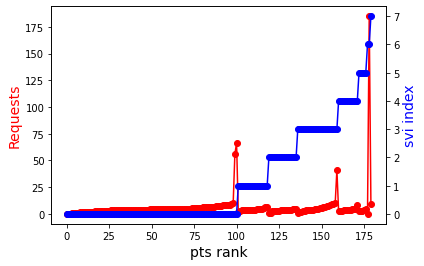

In [ ]:
# create figure and axis objects with subplots()
plt_req=[x[2] for x in points_requests]
plt_pts=[x[1] for x in points_requests]
print(plt_pts)
fig,ax = plt.subplots()
i = range(len(points_requests))
# make a plot
ax.plot(i, 
        plt_req,
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("pts rank", fontsize = 14)
# set y-axis label
ax.set_ylabel("Requests",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(i, plt_pts,color="blue",marker="o")
ax2.set_ylabel("svi index",color="blue",fontsize=14)
#plt.show()
# save the plot as a file
fig.savefig('/content/drive/MyDrive/sparkfigs/index_request.png')
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

In [ ]:
#print(ind["requests"])
#ind.insert(ind.shape[1],'requests',0)
#ind.insert(ind.shape[1],'ratio_requests',0)
sort_rnums=r["CT_ID_10"].value_counts()
#print(sort_rnums)
#for row in sort_rnums.iterrows():
CT_all=np.array(ind["GEOID10(census tract)"])
sorted_sr=[]
for CT in CT_all:
  #print(CT)
  sorted_sr.append(sort_rnums[CT])
ind.insert(ind.shape[1],'ratio_requests',sorted_sr)
#ind.loc[:,ind.shape[1]]=sorted_sr
  #ind.loc[ind["GEOID10(census tract)"]==CT]['requests']=sort_rnums[CT]
print(ind["requests"])
print(ind["GEOID10(census tract)"])
print(sort_rnums[25025010405])

0       7482
1       7237
2       7986
3      23186
4       6536
       ...  
175    13579
176    14983
177     9662
178    20631
179    14632
Name: requests, Length: 180, dtype: int64
0      25025010405
1      25025010404
2      25025010801
3      25025010702
4      25025010204
          ...     
175    25025081800
176    25025081700
177    25025081500
178    25025081400
179    25025081300
Name: GEOID10(census tract), Length: 180, dtype: int64
7482


In [ ]:
ind.to_csv("/content/drive/MyDrive/New_middle.csv")